In [1]:
import numpy as np
import matplotlib.pyplot as plt

def redpr(str):
    print('\x1b[31m' + str + '\x1b[0m')

In [2]:
lines = np.arange(-16, 16.1, .5)
siz = len(lines)
data_all = np.zeros((siz, 6))
data_all[:, 0] = lines

conv_kernel = 7

leagues = ['NFL2016bis', 'NFL2017bis', 'NFL2018bis']
start_week = [1, 1, 1]
end_week = [17, 17, 17] 

In what follows y denotes the spread:

### league: NFL2016bis
week: 1
week: 2
week: 3
week: 4
week: 5
week: 6
week: 7
week: 8
week: 9
week: 10
week: 11
week: 12
week: 13
week: 14
week: 15
week: 16
week: 17

### league: NFL2017bis
week: 1
week: 2
week: 3
week: 4
week: 5
week: 6
week: 7
week: 8
week: 9
week: 10
week: 11
week: 12
week: 13
week: 14
week: 15
week: 16
week: 17

### league: NFL2018bis
week: 1
week: 2
week: 3
week: 4
week: 5
week: 6
week: 7
week: 8
week: 9
week: 10
week: 11
week: 12
week: 13
week: 14
week: 15
week: 16
week: 17

### TOTAL:

1 bin:

-20<= y < 20:  d.pts:   768    win:   319   X:     4   loss:   445   avg. margin  -2.4
               percentages     win:  0.42   X:  0.01   loss:  0.58
               odds            win:  2.41   X: 192.00   loss:  1.73

all bins:

-12.5:  d.pts:     0    win:     0   X:     0   loss:     0   avg. margin   nan
                     percentages     win:   nan   X:   nan   loss:   nan
                     odds            win:   nan   

/Users/possanner/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in double_scalars
/Users/possanner/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in double_scalars
/Users/possanner/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in double_scalars
/Users/possanner/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in double_scalars
/Users/possanner/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:104: RuntimeWarning: divide by zero encountered in double_scalars


Text(0,0.5,'Win Pct.')

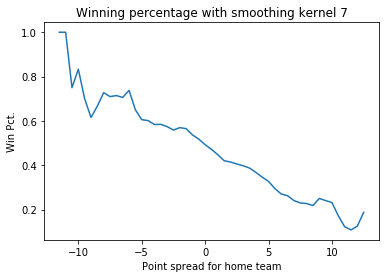

In [3]:
k = 0
print('In what follows y denotes the spread:')
for l in leagues:
    print()
    print('### league:', l)
    data = np.zeros((siz, 6))
    data[:, 0] = lines
    
    for wk in range(start_week[k], end_week[k] + 1):
        print('week:', wk)
        f = open(l + '/Week' + str(wk) + '/Results_w' + str(wk) + '.txt')
        Results = list(f)
        g = open(l + '/Week' + str(wk) + '/Lines_w' + str(wk) + '.txt')
        Lines = list(g)

        for i in range(len(Results)):
            
            j1 = Results[i].index(',')
            j2 = Results[i].index(',', j1 + 1)
            j3 = Results[i].index(',', j2 + 1)
            j4 = Results[i].index(',', j3 + 1)
            j5 = Results[i].index(',', j4 + 1)
            j6 = Results[i].index(',', j5 + 1)
            j7 = Results[i].index(',', j6 + 1)

            team1 = Results[i][j3 + 1:j4]
            score1 = int(Results[i][j6 + 1:j7].rstrip().lstrip())
            field = Results[i][j4 + 1:j5]
            team2 = Results[i][j5 + 1:j6]
            score2 = int(Results[i][j7 + 1:].rstrip().lstrip())
            if field=='':
                score_away = score2
                score_home = score1
            elif field=='@':
                score_away = score1
                score_home = score2
            else:
                print('error, no home field')
            
            #print(i, score_home, score_away)
            
            line = float(Lines[i][0:5])
            #print(home, away, line1, line2)
            ind = lines == line
            #print(ind)
            data[ind, 1] += 1.
            data_all[ind, 1] += 1.
            if score_away - score_home > 0:
                data[ind, 2] += 1.
                data_all[ind, 2] += 1.
            elif score_away - score_home < 0:
                data[ind, 4] += 1.
                data_all[ind, 4] += 1.
            else:
                data[ind, 3] += 1.
                data_all[ind, 3] += 1.
            data[ind, 5] += score_away - score_home
            data_all[ind, 5] += score_away - score_home
        
        #print('data:')
        #print(data)
        #print()
        #print('data_all:')
        #print(data_all)
        #print()

        f.close()
        g.close()
        
    k += 1
    
print()
print('### TOTAL:')

# one bin:
games = np.sum(data_all[:, 1])
wins = np.sum(data_all[:, 2])
ties = np.sum(data_all[:, 3])
losses = np.sum(data_all[:, 4])
diff = np.sum(data_all[:, 5])
print()
print('1 bin:')
print()
redpr('{:3d}'.format(-20) + '<= y <' + '{:3d}'.format(20) + ':  d.pts: {0:5.0f}    win: {1:5.0f}   X: {2:5.0f}   loss: {3:5.0f}   avg. margin {4:5.1f}'.format(games, wins, ties, losses, diff/games))
print('               percentages     win: {1:5.2f}   X: {2:5.2f}   loss: {3:5.2f}'.format(games, wins/games, ties/games, losses/games))
redpr('               odds            win: {1:5.2f}   X: {2:5.2f}   loss: {3:5.2f}'.format(games, games/wins, games/ties, games/losses))
    
# twenty bin:
print()
print('all bins:')
x_data = []
y_data = []
for i in range(conv_kernel, len(lines) - conv_kernel):
    #print('i', i, i - conv_kernel, i + conv_kernel)
    games = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 1])
    wins = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 2])
    ties = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 3])
    losses = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 4])
    diff = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 5])
    
    print()
    redpr('{:5.1f}'.format(lines[i]) + ':  d.pts: {0:5.0f}    win: {1:5.0f}   X: {2:5.0f}   loss: {3:5.0f}   avg. margin {4:5.1f}'.format(games, wins, ties, losses, diff/games))
    print('                     percentages     win: {1:5.2f}   X: {2:5.2f}   loss: {3:5.2f}'.format(games, wins/games, ties/games, losses/games))
    redpr('                     odds            win: {1:5.2f}   X: {2:5.2f}   loss: {3:5.2f}'.format(games, games/wins, games/ties, games/losses))

    x_data.append(lines[i])
    y_data.append(wins/games)
    
plt.plot(x_data, y_data)
plt.title('Winning percentage with smoothing kernel ' + str(conv_kernel))
plt.xlabel('Point spread for home team')
plt.ylabel('Win Pct.')
# all bins:
#print('All bins:')
#for i in range(len(lines)):
#    games = np.sum(data_all[i:i + 1, 1])
#    wins = np.sum(data_all[i:i + 1, 2])
#    ties = np.sum(data_all[i:i + 1, 3])
#    losses = np.sum(data_all[i:i + 1, 4])
#    print()
#    redpr('y = {:5.1f}'.format(lines[i]) + ':  d.pts: {0:5.0f}    win: {1:5.0f}   X: {2:5.0f}   loss: {3:5.0f}'.format(games, wins, ties, losses))
#    print('               percentages     win: {1:5.2f}   X: {2:5.2f}   loss: {3:5.2f}'.format(games, wins/games, ties/games, losses/games))
#    redpr('               odds            win: {1:5.2f}   X: {2:5.2f}   loss: {3:5.2f}'.format(games, games/wins, games/ties, games/losses))

In [4]:
score_away

33